[ADS Entry](http://adsabs.harvard.edu/abs/1997ApJ...489..573L)

In [294]:
import sympy
sympy.init_printing()

Equation 1

In [295]:
P_rad = sympy.Symbol(r'P_{\rm rad}') # Radiation pressure
K = sympy.Symbol('K', positive=True) # Entropy
rho_gas = sympy.Symbol(r'\rho_{\rm gas}', positive=True) # Gas density
eqn_1 = sympy.Eq(P_rad, K*rho_gas**sympy.Rational(4,3))
eqn_1

Equation 2

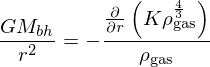

In [296]:
r = sympy.Symbol('r', positive=True) # Distance from the black hole
G = sympy.Symbol('G', positive=True) # Gravitation constant
M_bh = sympy.Symbol('M_{bh}', positive=True) # Black hole mass
_ = sympy.Eq(G*M_bh/r**2,-sympy.Derivative(P_rad,r)/rho_gas)
_ = _.subs(eqn_1.lhs, eqn_1.rhs)
eqn_2 = _
eqn_2

Equation 3

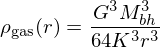

In [297]:
_ = eqn_2
_ = _.subs(rho_gas, rho_gas(r))
_ = _.doit()
_ = sympy.dsolve(_,rho_gas(r))
_ = _.subs(sympy.solve(sympy.limit(_.rhs,r,sympy.oo))[0])
eqn_3 = _
eqn_3

Equation 4

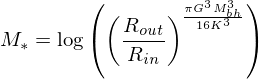

In [298]:
R_in = sympy.Symbol('R_{in}',positive=True) # Inner radius
R_out = sympy.Symbol('R_{out}', positive=True) # Outer radius
M_star = sympy.Symbol('M_*', positive=True) # Envelope mass
_ = 4*sympy.pi*rho_gas*r**2
_ = _.subs(rho_gas,eqn_3.rhs)
_ = sympy.integrate(_,(r,R_in,R_out))
_ = _.simplify()
eqn_4 = sympy.Eq(M_star, _)
eqn_4

Equation 5

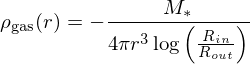

In [299]:
_ = eqn_3
_ = _.subs(M_bh,sympy.solve(eqn_4,M_bh)[0]).simplify()
eqn_5 = _
eqn_5

Equation 6

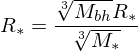

In [300]:
R_star = sympy.Symbol('R_*') # Initial radius of the star
eqn_6 = sympy.Eq(R_star, R_star*(M_bh/M_star)**sympy.Rational(1,3))
eqn_6

Equation 8

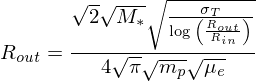

In [301]:
sigma_T = sympy.Symbol('sigma_T') # Thomson cross section
mu_e = sympy.Symbol('mu_e', positive=True) # Mean atomic weight per electron
m_p = sympy.Symbol('m_p', positive=True) # Proton mass
xi = sympy.Symbol('xi', positive=True) # Auxiliary variable
_ = sigma_T*rho_gas/(mu_e*m_p)
_ = _.subs(rho_gas, eqn_5.rhs)
_ = sympy.integrate(_,(r,R_out,sympy.oo))
_ = _.subs(R_in,R_out/xi)
_ = sympy.solve(_-1,R_out)[1]
_ = _.subs(xi,R_out/R_in)
eqn_8 = sympy.Eq(R_out,_)
eqn_8

Equation 9

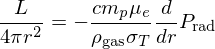

In [302]:
L = sympy.Symbol('L') # Luminosity
c = sympy.Symbol('c') # Speed of light
eqn_9 = sympy.Eq(L/(4*sympy.pi*r**2), -mu_e*m_p*c*sympy.Derivative(P_rad,r)/sigma_T/rho_gas)
eqn_9

Equation 10

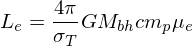

In [303]:
L_e = sympy.Symbol('L_e') # Eddington luminosity
_ = eqn_9
_ = _.subs(sympy.Derivative(P_rad,r),-rho_gas*G*M_bh/r**2)
eqn_10 = sympy.Eq(L_e,sympy.solve(_,L)[0])
eqn_10

Equation 11

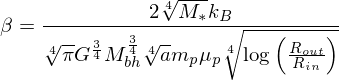

In [304]:
beta = sympy.Symbol('beta') # Ratio between gas and total pressure
a = sympy.Symbol('a', positive=True) # Radiation constant
T = sympy.Symbol('T') # Temperature
P_gas = sympy.Symbol(r'P_{\rm gas}') # Gas pressure
k_B = sympy.Symbol('k_B') # Boltzmann constant
mu_p = sympy.Symbol('mu_p') # Particle mass per proton
gas_eos = sympy.Eq(P_gas,k_B*T*rho_gas/mu_p/m_p)
rad_eos = sympy.Eq(P_rad,a*T**4)
_ = P_gas/P_rad
_ = _.subs(gas_eos.lhs, gas_eos.rhs)
_ = _.subs(T,sympy.solve(rad_eos,T)[1])
_ = _.subs(eqn_1.lhs, eqn_1.rhs)
_ = _.subs(K, sympy.solve(sympy.Eq(eqn_5.rhs,eqn_3.rhs),K)[0].simplify())
eqn_11 = sympy.Eq(beta,_)
eqn_11

Equation 12

In [305]:
sigma = sympy.Symbol('sigma',positive=True) # Stefan Boltzmann constant
T_eff = sympy.Symbol(r'T_{eff}') # Effective temperature
eqn_12 = sympy.Eq(L_e,4*sympy.pi*R_out**2*sigma*T_eff**4)
eqn_12

Equation 13

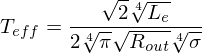

In [306]:
eqn_13 = sympy.Eq(T_eff,sympy.solve(eqn_12,T_eff)[1])
eqn_13

Equation 14

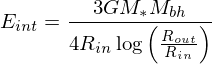

In [307]:
E_int = sympy.Symbol(r'E_{int}') # Internal energy
_ = 3*P_rad*4*sympy.pi*r**2
_ = _.subs(eqn_1.lhs, eqn_1.rhs)
_ = _.subs(rho_gas,eqn_5.rhs)
_ = _.subs(K, sympy.solve(sympy.Eq(eqn_5.rhs,eqn_3.rhs),K)[0].simplify())
_ = sympy.integrate(_,(r,R_in,R_out)).simplify()
_ = _.subs(R_out,sympy.exp(xi)*R_in).simplify()
_ = _.series(sympy.exp(xi),sympy.oo,1)
_ = _.subs(xi,sympy.log(R_out/R_in))
eqn_14 = sympy.Eq(E_int,_)
eqn_14

Equation 15

In [308]:
epsilon = sympy.Symbol('epsilon') # Accretion radiation efficiency
dot_M_star = sympy.Symbol(r'\dot{M}_*') # Accretion rate
eqn_15 = sympy.Eq(L_e,-epsilon*dot_M_star*c**2)
eqn_15

Equation 16

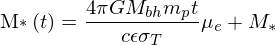

In [316]:
t = sympy.Symbol('t') # Time
_ = sympy.Eq(M_star(t).diff(t),-dot_M_star)
_ = _.subs(dot_M_star,sympy.solve(eqn_15,dot_M_star)[0])
_ = _.subs(eqn_10.lhs, eqn_10.rhs)
_ = sympy.dsolve(_,M_star(t))
_ = _.subs(sympy.solve(_.rhs.subs(t,0)-M_star,sympy.Symbol('C1'),dict=True)[0])
eqn_16 = _
eqn_16

Equation 17

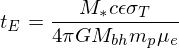

In [322]:
t_E = sympy.Symbol('t_E') # Eddington time
_ = 1/(eqn_16.rhs.diff(t)/M_star)
eqn_17 = sympy.Eq(t_E,_)
eqn_17

Equation 18

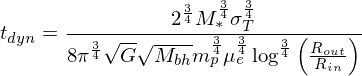

In [330]:
t_dyn = sympy.Symbol(r't_{dyn}') # Dynamical time
_ = 1/sympy.sqrt(G*M_bh/R_out**3)
_ = _.subs(eqn_8.lhs,eqn_8.rhs)
_ = sympy.expand_power_base(_,force=True)
_ = _.subs(R_out,sympy.exp(xi)*R_in)
_ = _.subs(xi,sympy.log(R_out/R_in))
eqn_18 = sympy.Eq(t_dyn,_)
eqn_18

Equation 19

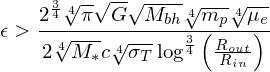

In [332]:
_ = sympy.Eq(t_E,t_dyn)
_ = _.subs(eqn_17.lhs, eqn_17.rhs)
_ = _.subs(eqn_18.lhs, eqn_18.rhs)
_ = sympy.solve(_,epsilon)[0]
eqn_19 = epsilon>_
eqn_19

Equation 20

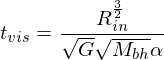

In [337]:
t_vis = sympy.Symbol(r't_{vis}') # Viscous timescale
eta = sympy.Symbol('eta') # Viscosity
alpha = sympy.Symbol('alpha') # Shakura Sunyaev alpha parameter
_ = sympy.Eq(t_vis,rho_gas*R_in**2/eta)
_ = _.subs(eta, alpha*P_rad*sympy.sqrt(R_in**3/G/M_bh))
_ = _.subs(P_rad,rho_gas*G*M_bh/R_in)
eqn_20 = _
eqn_20